Rafael Beltran Hernández 

In [4]:
import numpy as np
from IPython.display import Image

# Problema Ecuacion de París

* a) Para esta primera parte se establecen dos puntos $A$ y $B$. Y utilizando las siguientes relaciones del modelo de escala logarítmica de la ecuación de parís:

\begin{equation}
    \frac{da}{dN} = C (\Delta k)^m \\
    \log{\frac{da}{dN}} = \log{C (\Delta k)^m} \\
    \log{\frac{da}{dN}} = \log{C}+ m\log{\Delta k}
\end{equation}

Tomando los dos puntos previamente mencionados se tienen dos ecuaciones con dos incógnitas, y así encontrar las constantes, en primer lugar se tiene que $m$ equivale a:

\begin{equation}
    m = \frac{ \log{\frac{y_A}{y_B}} }{ \log{\frac{x_A}{x_B}} }
\end{equation}

Por otro lado, el valor de la constante C se puede calcular con las coordenadas de $A$:

\begin{equation}
   C = 10^{\log{y_A} - m \log{x_A}}
\end{equation}

A continuación se muestra la imagen que ubica los puntos y se realizará el procedimiento. 

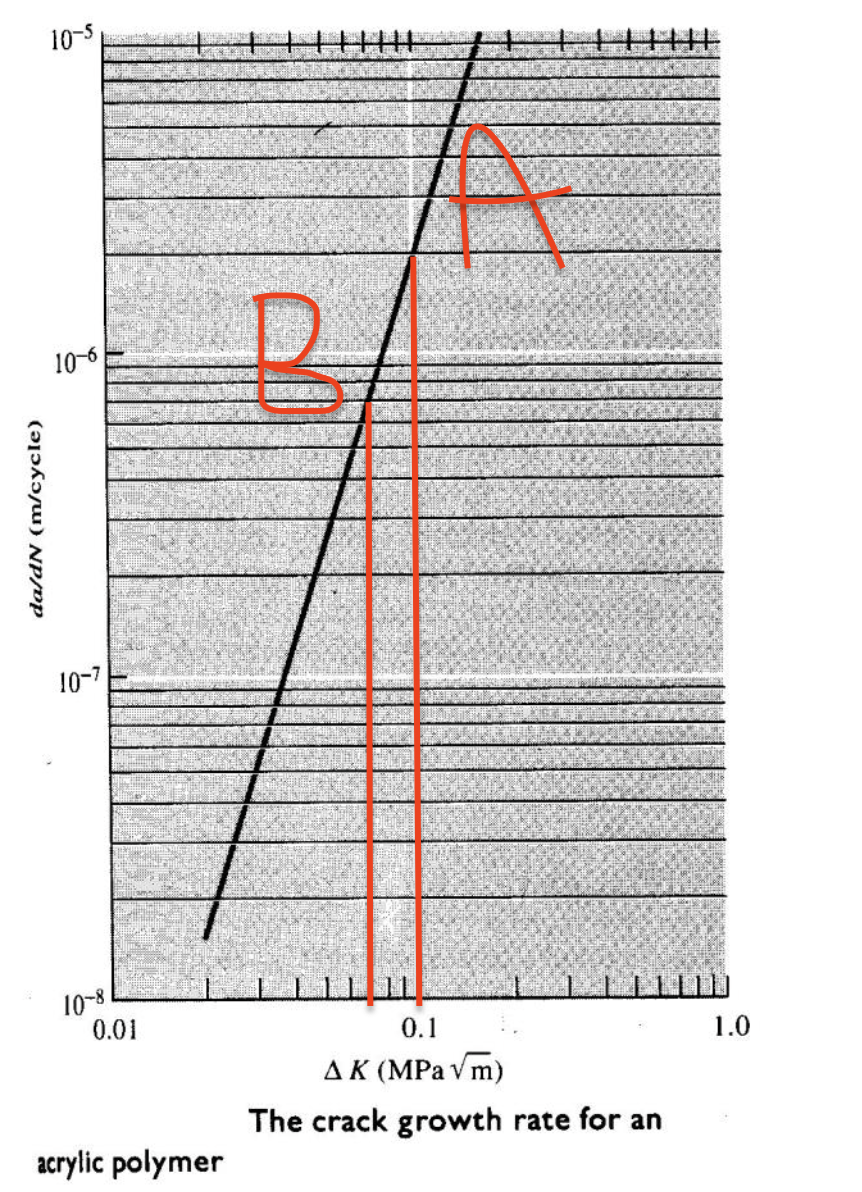

In [5]:
Image(filename='Imagenes Tareas/Semana 10 Punto 1.png')

In [2]:
from numpy import log10
# Coordenadas de puntos
xa, ya = 0.1,2e-6
xb, yb = 0.07,7e-7
# Solucion de constantes
m = log10(ya/yb)/log10(xa/xb)
C = 10**(log10(ya) - m* log10(xa))
print('las constantes m y C son',m,C,'Respectivamente')

las constantes m y C son 2.9433582098747317 0.0017554489549287146 Respectivamente


* b) El factor de intensidad de esfuerzos es de:

\begin{equation}
    \Delta k = 20 \sqrt{\pi a}
\end{equation}

Ya con este valor, y utlizando el modelo utilizado con las constantes hayadas anteriormente, se encuentra el valor de la tasa de crecimiento de la grieta

In [17]:
a = 2.5e-6
dk = np.sqrt(np.pi*a)*20 # Mpa √m
print(dk)
vel = lambda k: C*(k**m)
print('En este caso la velocidad de propagacion de la grieta es de',vel(dk))

0.056049912163979296
En este caso la velocidad de propagacion de la grieta es de 3.639116595523443e-07


Este valor calculado con el modelo es acorde a lo mostrado en la gráfica

* c) Primero se tiene que encontrar el valor de la longitud crítica de la grieta con la expresión:

\begin{equation}
    a_c = \frac{k_i^2}{\sigma^2 \pi}
\end{equation}

Posteriormente se calcula el valor de la cantidad de ciclos con:

\begin{equation}
    N_f = \frac{a_f^{1-m/2} - a_i^{1-m/2}}{C(\Delta \sigma \sqrt(\pi))^m (1-m/2)}
\end{equation}

In [22]:
ki = 2
sigma = 15
a_c = ki**2/(np.pi*sigma**2)
a_i = 0.001e-3
m2 = 1 - m/2
N = (  a_c**(m2) - a_i**(m2) )/(C*((sigma*np.sqrt(np.pi))**m) * (m2))
print('El numero de ciclos es',N)

El numero de ciclos es 51.43983398874209


# Problema de la viga rotando

* La resistencia a la fatiga para $10^5$ ciclos está dada por la ecuación:

\begin{equation}
    S_f = aN^b
\end{equation}

Donde las constantes $a$ y $b$ se encontrarán a continuación

In [3]:
f = 0.77
s_ut = 95
s_e = 42
a = (f*s_ut)**2 / s_e
b = -log10(f*s_ut/s_e)/3
sf = lambda n: a*(n**b)
print('La resistencia a la fatiga en este caso es de',round(sf(10**5),2),'ksi')

La resistencia a la fatiga en este caso es de 50.53 ksi


* La vida esperada se tiene con un modelo similar al inverso:

\begin{equation}
    N_{life} = \bigg(\frac{\sigma_{rev}}{a}\bigg)^{1/b}
\end{equation}

In [4]:
from math import floor
n_life = lambda s:  (s/a)**(1/b)
print('La esperanza de vida es de',floor(n_life(60)),'ciclos')

La esperanza de vida es de 11789 ciclos


# Problema de la barra de acero

En este ejercicio se usa un modelo parecido al ejercicio anterior, y usando la informacion del enunciado se encuentra la vida util de la pieza usando:

\begin{equation}
    N_{life} = \bigg(\frac{\sigma_{rev}}{a}\bigg)^{1/b}
\end{equation}


In [6]:
f = 0.9
s_ut = 55 # kip
s_e = 25
a = (f*s_ut)**2 / s_e
b = -log10(f*s_ut/s_e)/3
esfuerzo = 55/2
print('La esperanza de vida es de',floor(n_life(esfuerzo)),'ciclos')

La esperanza de vida es de 381434 ciclos
